In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of WASP-39
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-39b

In [3]:
df = pd.read_csv("WASP_39_literature.csv")#, header=None)
df = df.set_index('Parameter')


In [4]:
df

,TICv8,Gaia DR2,Mancini et al. 2018,Bonomo et al. 2017,Maciejewski et al. 2016,Faedi et al. 2011,ExoFOP-TESS TOI
Parameter,,,,,,,
T_eff,5326.600+154.529-123.405,5341.0+203.0-89.7,5485+/-50,5400+/-150,---,5400+/-150,5326.600+/-138.967
stellar_radius,1.0134200+0.0712322-0.0590191,0.92868525+0.03199760-0.06676460,0.939+/-0.022,0.895+/-0.023,0.918+0.022-0.019,0.895+/-0.023,1.01341998577118+/-0.06512570000000
metallicity,---,---,0.01+/-0.09,-0.120+/-0.100,---,---,---
stellar_density,1.2434767+0.3401812-0.2671663,---,1.555+/-0.080,---,1.692+0.106-0.089,---,---
log_g,4.3893300+0.0890882-0.0833042,---,4.453+/-0.012,---,4.480+0.029-0.025,---,4.3893300+/-0.0861962
colour,#1f77b4,#ff7f0e,#2ca02c,#d62728,#9467bd,#8c564b,#e377c2


In [5]:
df_ref_list = df.columns

df_T_eff_list = df.loc['T_eff'] #Stellar effective temperature (K)
df_metallicity_list = df.loc['metallicity'] #Metallicity ([Fe/H])
df_log_g_list = df.loc['log_g'] #Stellar surface gravity (log10(cm/s^2)
df_rs_list = df.loc['stellar_radius']

T_eff_list, T_eff_ref_list = read_df_params(df_T_eff_list, df_ref_list)
metallicity_list, metallicity_ref_list = read_df_params(df_metallicity_list, df_ref_list)
log_g_list, log_g_ref_list = read_df_params(df_log_g_list, df_ref_list)
rs_list, rs_ref_list = read_df_params(df_rs_list, df_ref_list)

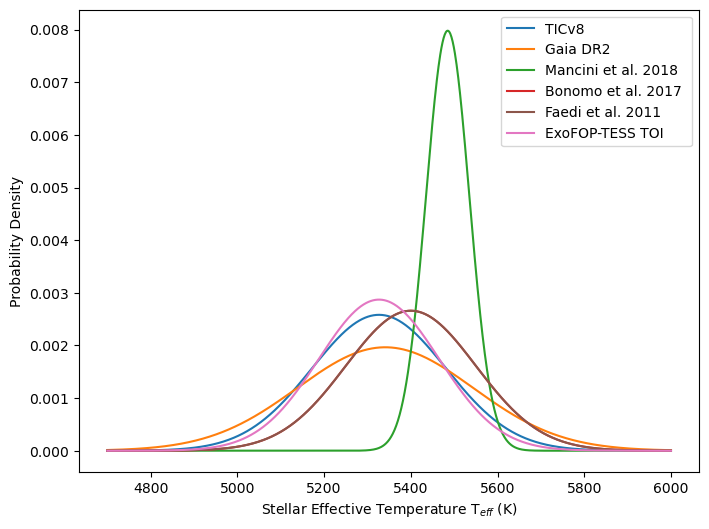

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(4700, 6000, 1000)
for obj, author in zip(T_eff_list, T_eff_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Effective Temperature T$_{eff}$ (K)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

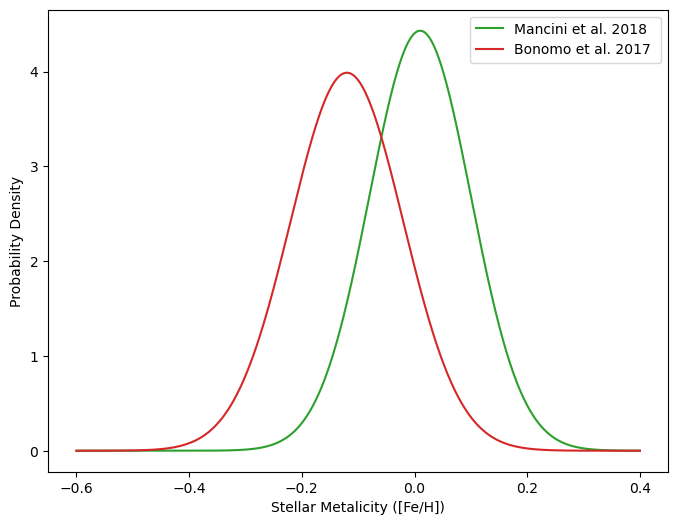

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(-0.6, 0.4, 1000)
for obj, author in zip(metallicity_list, metallicity_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Metalicity ([Fe/H])")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

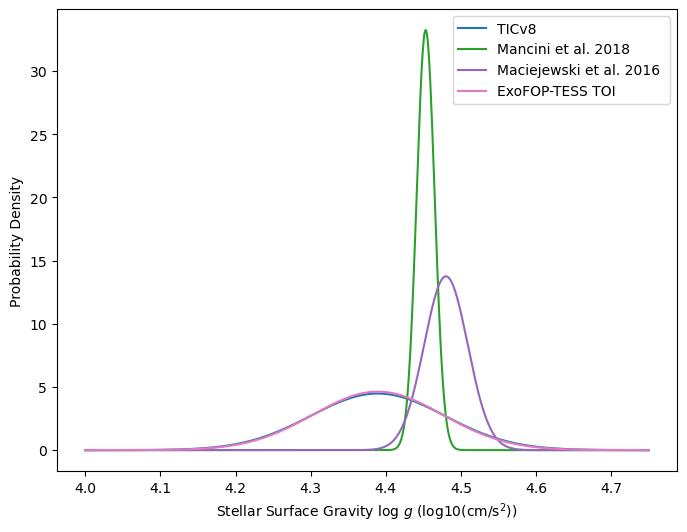

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(4, 4.75, 1000)
for obj, author in zip(log_g_list, log_g_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Surface Gravity log $g$ (log10(cm/s$^2$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

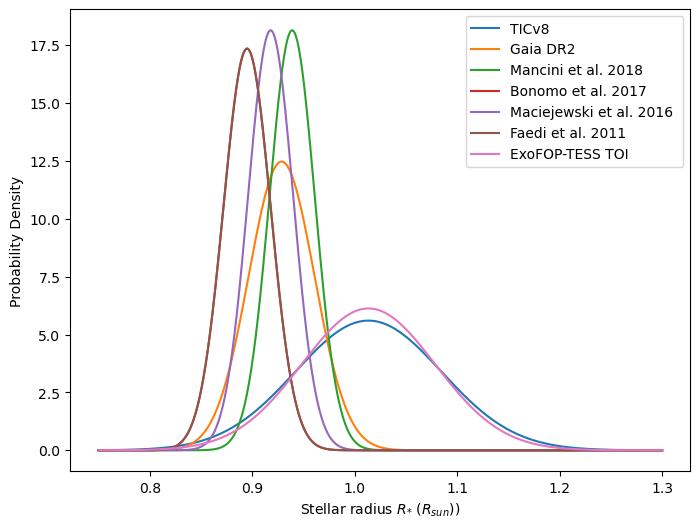

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.75, 1.3, 1000)
for obj, author in zip(rs_list, rs_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar radius $R_{*}$ ($R_{sun}$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()